# The U.S. economy is entering a period of fiscal uncertainty and elevated inflation risk. Characterized with record national debt, rising interest expenses, and structural budget deficits.

- The Investments Committee has recently emphasized concerns around fiscal stress, interest rate pressures, and the potential crowding-out effects on private investment. (as per the Macroeconomics sector's commentary)

- In this environment, understanding how inflation evolves—and how different markets respond under different inflationary regimes—is essential for informed portfolio risk management and sector allocation.

---
## We look first to choose the data we wish to use to classify these inflationary regimes.
- We'll look at factors like the following:
    - From FRED: 
        - Consumer Price Index
        - GDP
        - Unemployment rates

    - From Yahoo Finance:
        - Sector returns (ie from XLF, XLK, XLY)
        - Market returns (SPY)
        - Volatility (in sectors and in market)
    
    - From US Treasury:
        - Yield Curve Spreads (10 year to 2 year, 10 year to 3 month)
        - interest rates
        
We aim to analyze a broad spread of regimes so we will look at the time from 2000-present (march 1st 2025). This includes the dot com bubble burst, the 2008 Financial crisis, covid, as well as the current macro environment.

We will import this data, and begin to analyze it's effect. 

In [511]:
import pandas as pd
import numpy as np

# Import Macroeconomic Data Monthly Time Frame from 2000 Jan 1 to 2025 March 1 (from FRED)

# Consumer Price Index for All Urban Consumers: All Items (Not seasonally adjusted)
CPIAUCNS = pd.read_csv("MacroData/CPIAUCNS.csv", parse_dates=["DATE"]) 
CPIAUCNS_monthly_change = CPIAUCNS.copy()
CPIAUCNS_monthly_change["CPIAUCNS"] = CPIAUCNS["CPIAUCNS"].pct_change(periods=1) # Monthly change in CPI
CPIAUCNS_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
CPIAUCNS_monthly_change["DATE"] = pd.to_datetime(CPIAUCNS_monthly_change["DATE"])
CPIAUCNS_monthly_change.set_index("DATE", inplace=True)

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy (Seasonally adjusted)
CPILFESL = pd.read_csv("MacroData/CPILFESL.csv", parse_dates=["DATE"]) 
CPILFESL_monthly_change = CPILFESL.copy()
CPILFESL_monthly_change["CPILFESL"] = CPILFESL["CPILFESL"].pct_change(periods=1) # Monthly change in CPI
CPILFESL_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
CPILFESL_monthly_change["DATE"] = pd.to_datetime(CPILFESL_monthly_change["DATE"])
CPILFESL_monthly_change.set_index("DATE", inplace=True)

# Unemployment Rate
UNRATE = pd.read_csv("MacroData/UNRATE.csv", parse_dates=["DATE"]) # Unemployment Rate
UNRATE_monthly_change = UNRATE.copy()
UNRATE_monthly_change["UNRATE"] = UNRATE["UNRATE"].pct_change(periods=1) # Monthly change in Unemployment Rate
UNRATE_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
UNRATE["DATE"] = pd.to_datetime(UNRATE["DATE"])
UNRATE.set_index("DATE", inplace=True)

# Real GDP (NOTE THAT THIS IS QUARTERLY AND STOPS IN 2024 Q4 (Oct 1))
GDP = pd.read_csv("MacroData/GDPC1.csv", parse_dates=["DATE"]) # Real GDP
GDP_quarterly_change = GDP.copy()
GDP_quarterly_change["GDP"] = GDP["GDPC1"].pct_change(periods=1) # Quarterly change in GDP
GDP_quarterly_change.iloc[0, 1] = 0 # Replace the NaN value with 0
GDP["DATE"] = pd.to_datetime(GDP_quarterly_change["DATE"])
GDP.set_index("DATE", inplace=True)

# Fed Funds rate
FEDFUNDS = pd.read_csv("MacroData/FEDFUNDS.csv", parse_dates=["DATE"])
FEDFUNDS["DATE"] = pd.to_datetime(FEDFUNDS["DATE"])
FEDFUNDS.set_index("DATE", inplace=True)


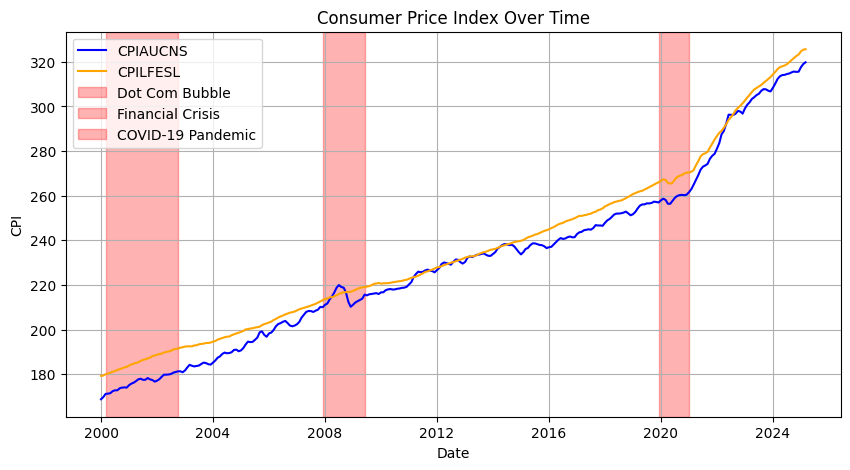

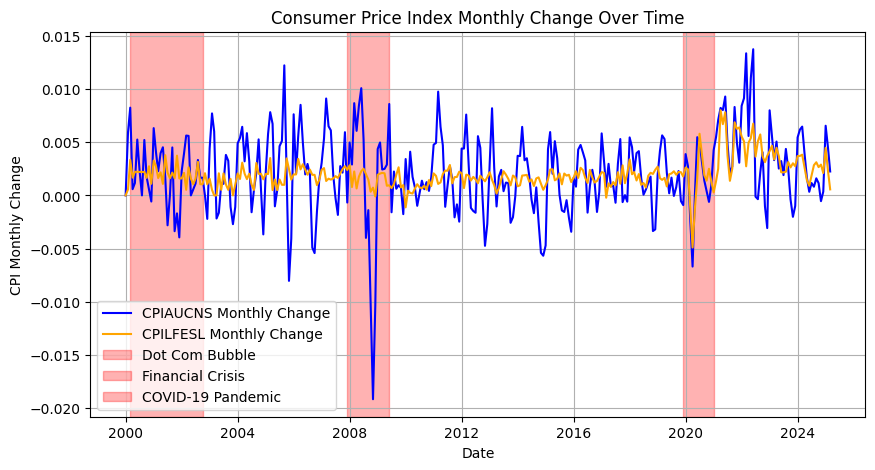

In [512]:
# Now that the data is imported, let's graph and notice some fundamental correlations.
# We'll also want to highlight important time periods, like the dot com bubble burst, the 2008 financial crisis, and covid

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

notable_date_ranges = {
    "Dot Com Bubble": ("2000-03-01", "2002-10-01"),
    "Financial Crisis": ("2007-12-01", "2009-06-01"),
    "COVID-19 Pandemic": ("2019-12-01", "2021-01-01")
}
# Plot the CPIs on the same graph
plt.figure(figsize=(10, 5))
plt.plot(CPIAUCNS["DATE"], CPIAUCNS["CPIAUCNS"], label="CPIAUCNS", color="blue")
plt.plot(CPILFESL["DATE"], CPILFESL["CPILFESL"], label="CPILFESL", color="orange")
# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Consumer Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.grid()
plt.show()

# Then plot the change in CPIS
plt.figure(figsize=(10, 5))
plt.plot(CPIAUCNS_monthly_change.index, CPIAUCNS_monthly_change["CPIAUCNS"], label="CPIAUCNS Monthly Change", color="blue")
plt.plot(CPILFESL_monthly_change.index, CPILFESL_monthly_change["CPILFESL"], label="CPILFESL Monthly Change", color="orange")
# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Consumer Price Index Monthly Change Over Time")
plt.xlabel("Date")
plt.ylabel("CPI Monthly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on CPI over time.
- CPI Tends to dip during the recessions, due to the economic nature of them.
- Additionally, looking at the post-covid time frame tells us that CPI goes up during inflationary periods (ie stimulus checks)
- Seasonally adjusted (less food and energy) is much more robust, and shows smaller changes month over month.
- We can look for CPI having a low or negative change MoM as an indicator of recession-like regimes, but it is important that this change persists over several months, otherwise the change is likely just noise.

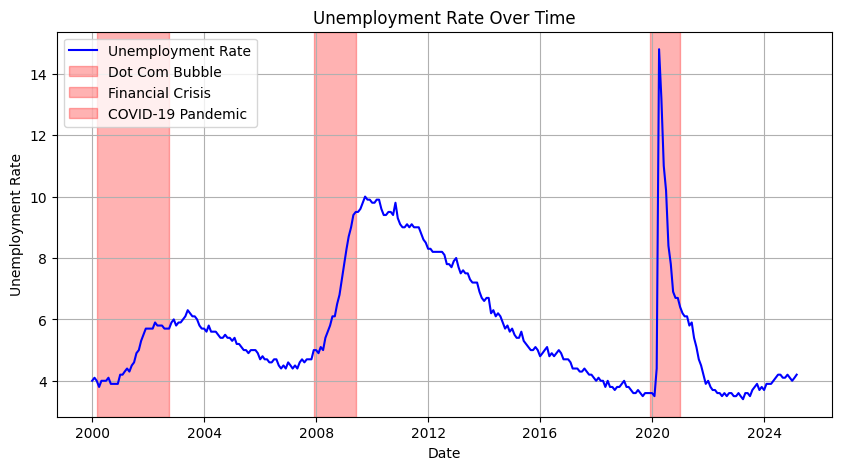

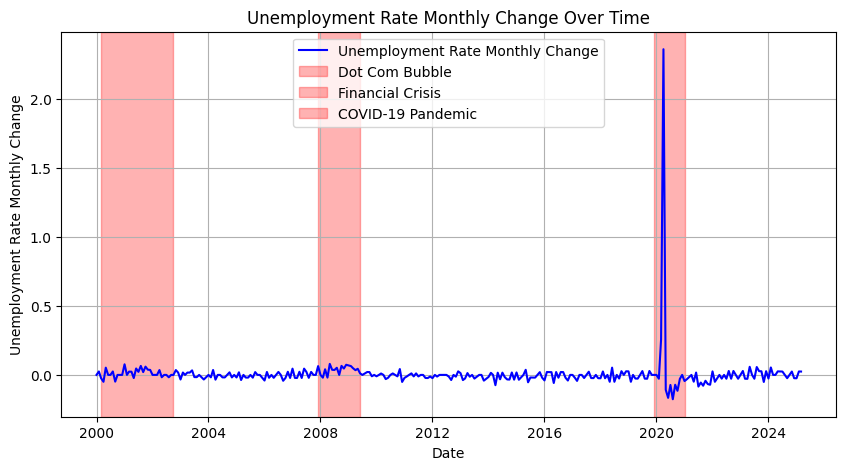

In [513]:
# Now lets look at the unemployment rate
plt.figure(figsize=(10, 5))
plt.plot(UNRATE.index, UNRATE["UNRATE"], label="Unemployment Rate", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.grid()
plt.show()

# Now lets look at the change in unemployment rate
plt.figure(figsize=(10, 5))
plt.plot(UNRATE_monthly_change["DATE"], UNRATE_monthly_change["UNRATE"], label="Unemployment Rate Monthly Change", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Unemployment Rate Monthly Change Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate Monthly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on Unemployment rate over time.
- Unemployment is VERY visibly tied to recession time periods. Recession --> high unemplyment rate.
- In terms of monthly changes, we want to look for consistent negative changes. However I think we should focus directly on the Unemployment Rate, instead of the change month over month. The change seems a layer too far abstracted to hold enough information.

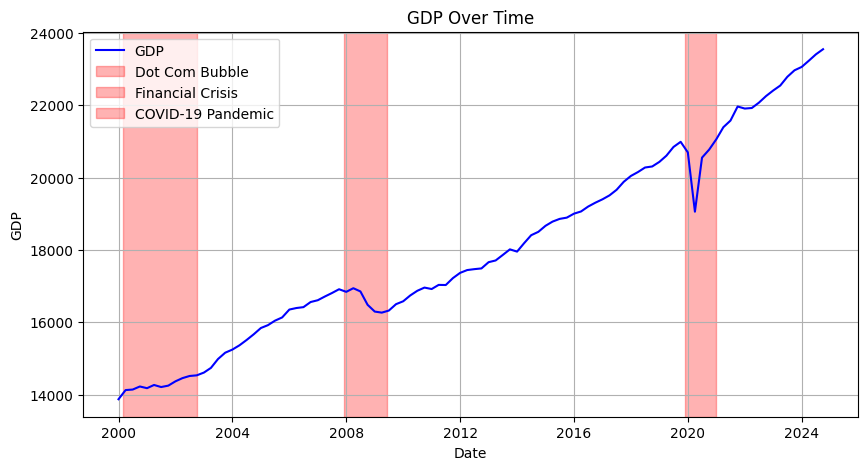

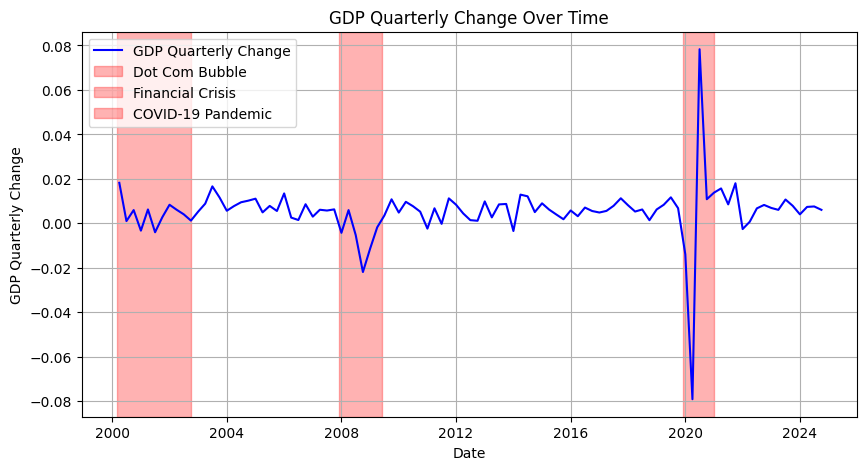

In [514]:
# Now lets look at the GDP
plt.figure(figsize=(10, 5))
plt.plot(GDP.index, GDP["GDPC1"], label="GDP", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("GDP Over Time")
plt.xlabel("Date")
plt.ylabel("GDP")
plt.legend()
plt.grid()
plt.show()

# Now lets look at the change in GDP
plt.figure(figsize=(10, 5))
plt.plot(GDP_quarterly_change["DATE"], GDP_quarterly_change["GDP"], label="GDP Quarterly Change", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("GDP Quarterly Change Over Time")
plt.xlabel("Date")
plt.ylabel("GDP Quarterly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on GDP:
- GDP is also closely tied to recessionary periods (as expected by definition). We want to look for consecutive quarters of negative GDP change.

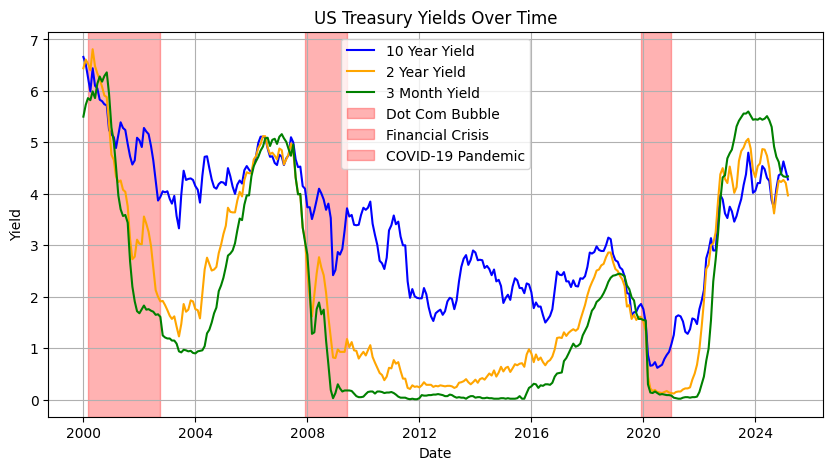

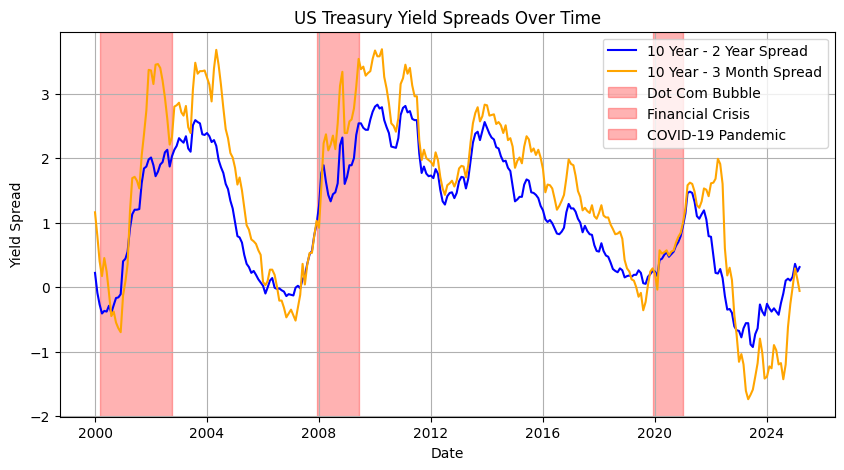

In [515]:
# Now Let's move into the yield spreads.

TenYear = pd.read_csv("MacroData/GS10.csv", parse_dates=["DATE"]) # 10 Year Treasury Yield
TwoYear = pd.read_csv("MacroData/GS2.csv", parse_dates=["DATE"]) # 2 Year Treasury Yield
ThreeMonth = pd.read_csv("MacroData/GS3M.csv", parse_dates=["DATE"]) # 3 Month Treasury Yield

# Calculate the spreads (10Y - 2Y and 10Y - 3M)
Ten_Two_Spread = pd.DataFrame({"DATE": TenYear["DATE"], "Ten_Two_Spread": TenYear["GS10"] - TwoYear["GS2"]})
Ten_Two_Spread["DATE"] = pd.to_datetime(Ten_Two_Spread["DATE"])
Ten_Two_Spread.set_index("DATE", inplace=True)

Ten_Three_Spread = pd.DataFrame({"DATE": TenYear["DATE"], "Ten_Three_Spread": TenYear["GS10"] - ThreeMonth["GS3M"]})
Ten_Three_Spread["DATE"] = pd.to_datetime(Ten_Three_Spread["DATE"])
Ten_Three_Spread.set_index("DATE", inplace=True)

# Plotting the yields all on the same graph, with notable date ranges highlighted
plt.figure(figsize=(10, 5))
plt.plot(TenYear["DATE"], TenYear["GS10"], label="10 Year Yield", color="blue")
plt.plot(TwoYear["DATE"], TwoYear["GS2"], label="2 Year Yield", color="orange")
plt.plot(ThreeMonth["DATE"], ThreeMonth["GS3M"], label="3 Month Yield", color="green")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("US Treasury Yields Over Time")
plt.xlabel("Date")
plt.ylabel("Yield")
plt.legend()
plt.grid()
plt.show() # First graph

# Plotting the spreads (10Y - 2Y and 10Y - 3M) on the same graph, with notable date ranges highlighted
plt.figure(figsize=(10, 5))
plt.plot(Ten_Two_Spread.index, Ten_Two_Spread["Ten_Two_Spread"], label="10 Year - 2 Year Spread", color="blue")
plt.plot(Ten_Three_Spread.index, Ten_Three_Spread["Ten_Three_Spread"], label="10 Year - 3 Month Spread", color="orange")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("US Treasury Yield Spreads Over Time")
plt.xlabel("Date")
plt.ylabel("Yield Spread")
plt.legend()
plt.grid()
plt.show() # Second graph

### Observations on treasury yields and spreads
- We can notice that as a precursor to all of these recent recessions, the return on 2-year and 3-month treasury securities exceeds that of the return on 10 year securities. 
- Now obviously this isn't "causing" recessions but it is a very clear indicator that recession is coming, and equivalently, if the T-Spread for 10Y-2Y or 10Y-3M treasury securities is negative, that signals recession.
- Looking at the recent numbers with that in mind is extremely worrying because the magnitude of the spread is larger than it was before any of these previous recessions, yet the government has yet to call our situation a recession.
---
### Now we'll examine IC's investment sector's performance during this same time frame.

In [516]:
import yfinance as yf
import datetime
import pandas as pd

# Import sector data from Yahoo Finance
sector_tickers = {
    "Utilities": "XLU",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Consumer Staples": "XLP",
    "Industrials": "XLI",
    "Healthcare": "XLV",
    "Financials": "XLF",
    "Technology": "XLK",
    "Real Estate": "XLRE",
    "Communications/Media": "XLC",
    "Fixed Income Proxy": "AGG"
}


start_date = "2000-01-01"
end_date = "2025-03-02" # This is on the 2nd because yfinance uses the end date as exclusive
for sector, ticker in sector_tickers.items():
    # Note that my jupyter Environment is blocking yfinance by firewall, so I ran this code block on a web env.
    continue
    data = yf.download(ticker, start=start_date, end=end_date, progress=False, interval="1mo")
    data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
    data.to_csv(f"SectorData/{ticker}.csv")

In [517]:
# View the head of data for all sectors.

for sector, ticker in sector_tickers.items():
    data = pd.read_csv(f"SectorData/{ticker}.csv", parse_dates=["DATE"])
    print(f"{sector} Data:")
    print(data.head(), "\n")

Utilities Data:
        DATE      Close
0 2000-01-01  11.417317
1 2000-02-01  10.029688
2 2000-03-01  11.042982
3 2000-04-01  11.853545
4 2000-05-01  11.827538 

Energy Data:
        DATE      Close
0 2000-01-01  14.127126
1 2000-02-01  13.529083
2 2000-03-01  15.161618
3 2000-04-01  14.985364
4 2000-05-01  16.745008 

Consumer Discretionary Data:
        DATE      Close
0 2000-01-01  20.298128
1 2000-02-01  19.167219
2 2000-03-01  21.837097
3 2000-04-01  21.424122
4 2000-05-01  20.267628 

Consumer Staples Data:
        DATE      Close
0 2000-01-01  12.740108
1 2000-02-01  11.249339
2 2000-03-01  11.634881
3 2000-04-01  12.291086
4 2000-05-01  13.167791 

Industrials Data:
        DATE      Close
0 2000-01-01  17.266600
1 2000-02-01  16.313959
2 2000-03-01  18.546711
3 2000-04-01  18.853455
4 2000-05-01  18.773901 

Healthcare Data:
        DATE      Close
0 2000-01-01  20.676533
1 2000-02-01  19.324572
2 2000-03-01  21.062811
3 2000-04-01  20.816029
4 2000-05-01  20.258064 

Financia

Something really annoying to note here is that for Real Estate, Communications, and Fixed Income, we don't have data from 2000-01 because these ETFs did not exist during that time. For the scope of this project, we're going to ignore Fixed Income, Communications, and Real Estate. That can be something to add in the future.

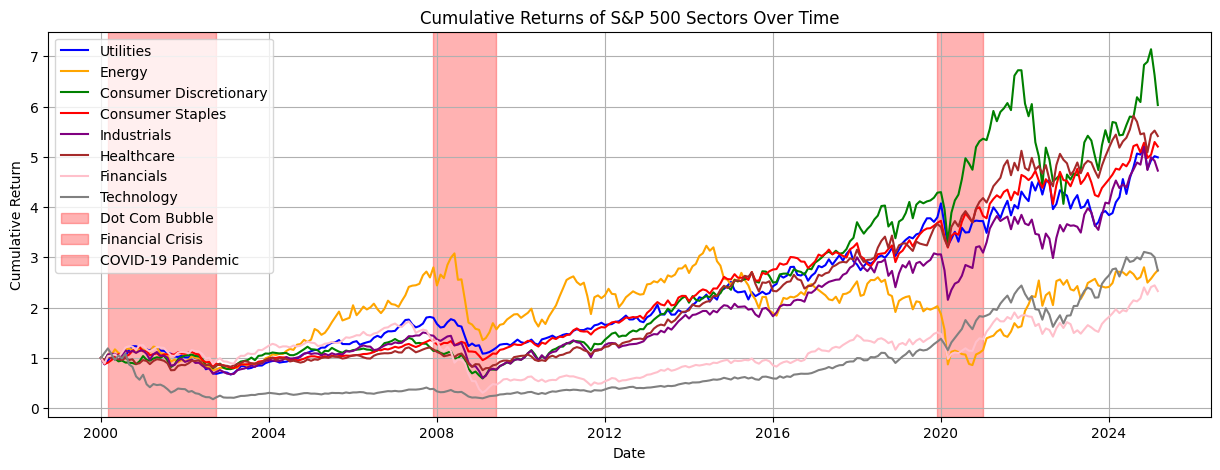

In [518]:
# Now let's get monthly log returns for each sector and plot them.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

included_sectors = {
    "Utilities": "XLU",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Consumer Staples": "XLP",
    "Industrials": "XLI",
    "Healthcare": "XLV",
    "Financials": "XLF",
    "Technology": "XLK"
}


sectors_df = pd.DataFrame()
sectors_df["DATE"] = pd.date_range(start="2000-01-01", end="2025-03-01", freq="MS")
sectors_df.set_index("DATE", inplace=True)
for sector, ticker in included_sectors.items():
    data = pd.read_csv(f"SectorData/{ticker}.csv", parse_dates=["DATE"])
    data.set_index("DATE", inplace=True)
    data.rename(columns={"Close": f"{ticker} Close"}, inplace=True)
    sectors_df = pd.merge(sectors_df, data, left_index=True, right_index=True, how="outer")
    sectors_df[f"{ticker} Log Return"] = np.log(sectors_df[f"{ticker} Close"] / sectors_df[f"{ticker} Close"].shift(1))

# Replace all NaN values with 0
sectors_df.fillna(0, inplace=True)

sectors_df.head()

# Now lets plot cumulative returns for each sector
plt.figure(figsize=(15, 5))
plt.plot(sectors_df.index, (sectors_df["XLU Log Return"] + 1).cumprod(), label="Utilities", color="blue")
plt.plot(sectors_df.index, (sectors_df["XLE Log Return"] + 1).cumprod(), label="Energy", color="orange")
plt.plot(sectors_df.index, (sectors_df["XLY Log Return"] + 1).cumprod(), label="Consumer Discretionary", color="green")
plt.plot(sectors_df.index, (sectors_df["XLP Log Return"] + 1).cumprod(), label="Consumer Staples", color="red")
plt.plot(sectors_df.index, (sectors_df["XLI Log Return"] + 1).cumprod(), label="Industrials", color="purple")
plt.plot(sectors_df.index, (sectors_df["XLV Log Return"] + 1).cumprod(), label="Healthcare", color="brown")
plt.plot(sectors_df.index, (sectors_df["XLF Log Return"] + 1).cumprod(), label="Financials", color="pink")
plt.plot(sectors_df.index, (sectors_df["XLK Log Return"] + 1).cumprod(), label="Technology", color="gray")


# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Cumulative Returns of S&P 500 Sectors Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()


### Very clear trend here that sectors get affected a lot during these recessions and bearing regimes...
- But what's interesting is that some industries are affected much less than others, like Consumer Staples and Technology.
- It's also clear that certain industries have stronger correlations with one another, and also certain regimes have their own respective bear runs over time. Let's look at the correlation matrix bettween the monthly log returns.

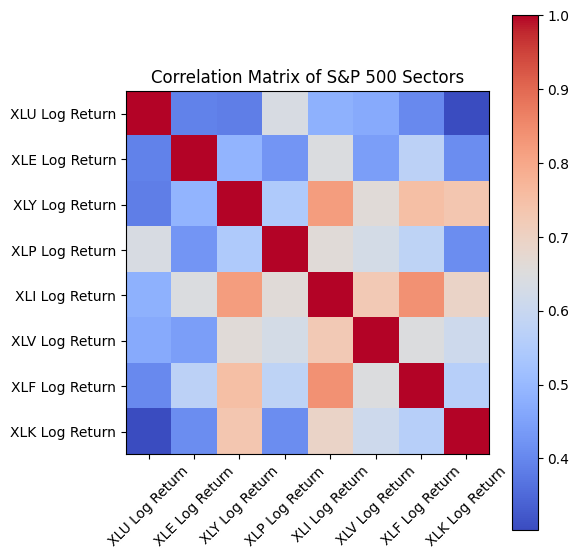

                XLU Log Return  XLE Log Return  XLY Log Return  \
XLU Log Return        1.000000        0.390553        0.385950   
XLE Log Return        0.390553        1.000000        0.488225   
XLY Log Return        0.385950        0.488225        1.000000   
XLP Log Return        0.635788        0.426795        0.547060   
XLI Log Return        0.481279        0.645161        0.817967   
XLV Log Return        0.467928        0.443106        0.659691   
XLF Log Return        0.406246        0.573522        0.752215   
XLK Log Return        0.303042        0.409326        0.731062   

                XLP Log Return  XLI Log Return  XLV Log Return  \
XLU Log Return        0.635788        0.481279        0.467928   
XLE Log Return        0.426795        0.645161        0.443106   
XLY Log Return        0.547060        0.817967        0.659691   
XLP Log Return        1.000000        0.660624        0.628798   
XLI Log Return        0.660624        1.000000        0.724936   
XLV Log R

In [519]:
# Correlation matrix of the sectors
log_returns = sectors_df[[f"{ticker} Log Return" for ticker in included_sectors.values()]].copy()
correlation_matrix = log_returns.corr()

# Plotting the correlation matrix with labels
plt.figure(figsize=(6, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title("Correlation Matrix of S&P 500 Sectors")
plt.tight_layout()
plt.show()

print(correlation_matrix)


### Important notes: 
- Cyclicals sectors (energy, financials, industrials) move together. Industrials have the strongest correlations (XLI–XLF: 0.84, XLI–XLY: 0.82), signaling that sector movements and activities (news sentiment etc.) can cause mutual sensitivity to economic growth and monetary cycles.

- Utilities (XLU) consistently show the lowest correlation with other sectors (XLU–XLK: 0.30), underscoring their role as a defensive hedge in macro-stressed regimes (especially right now).

- These relationships likely vary across monetary regimes (ie fed tightening vs easing), making regime-based correlation analysis a critical input for adaptive sector allocation.

---
# Our goal now is to use our macro and overall market data to develop a Hidden Markov Model to identify and classify 4 Regimes.
- This will include, data preprocessing and parameter selection (% changes in CPI, log returns of SPY, Volatility, etc), model selection (I'm inclined to use a Hidden Semi-Markov Model for more robust modeling), and execution (classify).

### We're going to begin with developing our dataframe. We want to use the following data points:
- SPY Monthly Returns and Volatility (NOTE that our data for SPY is on a daily time frame, we will convert to monthly returns and monthly vol)
- CPI MoM % Changes
- Core (w/o food and energy) CPI MoM % Changes
- Unemployment rate
- GDP MoM % Changes (Note that GDP data is quarterly, so we will develop a monthly effective growth rate)
- 10Y-2Y Treasury Yield Spread
- 10Y-3M Treasury Yield Spread
- Fed Funds Rate (not analyzed earlier)

We will need to normalize our data to prevent and avoid scale dominance. Todo this we will use Z-scores.

In [520]:
# Let's develop our training matrix.
HMM_data = pd.DataFrame()
HMM_data["DATE"] = pd.date_range(start="2000-01-01", end="2025-03-01", freq="MS")
HMM_data.set_index("DATE", inplace=True)

# Import the SPY.csv close daily data. We will compute the log returns and then take the monthly accumulated.
SPY = pd.read_csv("SPY.csv", parse_dates=["DATE"])
SPY.set_index("DATE", inplace=True)
SPY["log_returns"] = np.log(SPY["Close"] / SPY["Close"].shift(1))
SPY["log_returns"] = SPY["log_returns"].fillna(0)

# Now we will take the monthly accumulated log returns and add them to the HMM_data dataframe.
# Note that to get monthy returns, we add log returns from the PREVIOUS month. 
# We can use resample to sum the log returns for each month, and then shift the scale to get the actual accumulated returns from the previous month.
# We will need to fill 2000-01-01 with 0, as we don't have data from december 1999
monthly_returns = SPY["log_returns"].resample("MS").sum()
monthly_returns = monthly_returns.shift(1) # Shift to get the previous month returns
monthly_returns = monthly_returns.reindex(HMM_data.index, method="ffill") # Reindex to match the HMM_data index


HMM_data["SPY Log Return"] = monthly_returns
HMM_data["SPY Log Return"] = HMM_data["SPY Log Return"].fillna(0)

# Now we add SPY volatility of the previous month to the HMM_data dataframe.
SPY["rolling_vol"] = SPY["log_returns"].rolling(window=21).std()

# Resample to month-end and take last rolling volatility value each month
monthly_vol = SPY["rolling_vol"].resample("ME").last()

# Shift it forward so Jan volatility shows up under Feb 1
monthly_vol.index = monthly_vol.index + pd.DateOffset(days=1)
monthly_vol.index = monthly_vol.index.to_period("M").to_timestamp()


HMM_data["SPY Realized Vol"] = monthly_vol
HMM_data["SPY Realized Vol"] = HMM_data["SPY Realized Vol"].bfill() # Back fill volatility, because volatility is Temporal and Persistent
HMM_data

,SPY Log Return,SPY Realized Vol
DATE,,
2000-01-01,0.000000,0.014287
2000-02-01,-0.041234,0.014287
2000-03-01,-0.015344,0.014287
2000-04-01,0.092502,0.016857
2000-05-01,-0.035752,0.021163
...,...,...
2024-11-01,-0.008964,0.007102
2024-12-01,0.057923,0.008786
2025-01-01,-0.024354,0.009084


In [521]:
# Now that our SPY data is in, let's add Macro data.
# - CPI MoM % Changes                                CHECK
# - Core (w/o food and energy) CPI MoM % Changes     CHECK
# - Unemployment rate                                CHECK
# - GDP MoM % Changes (Note GDP data is quarterly)   CHECK
# - 10Y-2Y Treasury Yield Spread                     CHECK
# - 10Y-3M Treasury Yield Spread                     CHECK
# - Fed Funds Rate (not analyzed earlier)            CHECK

# Force all macro series to use month-start timestamps (we were getting index errors before)
CPIAUCNS_monthly_change.index = CPIAUCNS_monthly_change.index.to_period("M").to_timestamp()
CPILFESL_monthly_change.index = CPILFESL_monthly_change.index.to_period("M").to_timestamp()
UNRATE.index = UNRATE.index.to_period("M").to_timestamp()
Ten_Two_Spread.index = Ten_Two_Spread.index.to_period("M").to_timestamp()
Ten_Three_Spread.index = Ten_Three_Spread.index.to_period("M").to_timestamp()
FEDFUNDS.index = FEDFUNDS.index.to_period("M").to_timestamp()

HMM_data["CPI_MoM"] = CPIAUCNS_monthly_change["CPIAUCNS"]
HMM_data["Core_CPI_MoM"] = CPILFESL_monthly_change["CPILFESL"]
HMM_data["Unemployment_Rate"] = UNRATE["UNRATE"]
HMM_data["10Y-2Y_Spread"] = Ten_Two_Spread["Ten_Two_Spread"]
HMM_data["10Y-3M_Spread"] = Ten_Three_Spread["Ten_Three_Spread"]
HMM_data["Fed_Funds_Rate"] = FEDFUNDS["FEDFUNDS"]

# GDP is quarterly, so we need to convert it to monthly effective.
GDP["GDP_Growth_QoQ"] = GDP["GDPC1"].pct_change()
GDP["GDP_Growth_QoQ"] = GDP["GDP_Growth_QoQ"].fillna(0)
GDP["GDP_Growth_MonthlyEffective"] = (1 + GDP["GDP_Growth_QoQ"]) ** (1/3) - 1

HMM_data["GDP_MoM"] = GDP["GDP_Growth_MonthlyEffective"]
HMM_data["GDP_MoM"] = HMM_data["GDP_MoM"].ffill() # Note that for the most recent quarter we don't have data, so this will also be FFILLed

HMM_data.to_csv("HMM_data.csv") # Save the data to a csv file
HMM_data

,SPY Log Return,SPY Realized Vol,CPI_MoM,Core_CPI_MoM,Unemployment_Rate,10Y-2Y_Spread,10Y-3M_Spread,Fed_Funds_Rate,GDP_MoM
DATE,,,,,,,,,
2000-01-01,0.000000,0.014287,0.000000,0.000000,4.0,0.22,1.16,5.45,0.000000
2000-02-01,-0.041234,0.014287,0.005924,0.000558,4.1,-0.09,0.79,5.73,0.000000
2000-03-01,-0.015344,0.014287,0.008245,0.003344,4.0,-0.27,0.40,5.85,0.000000
2000-04-01,0.092502,0.016857,0.000584,0.001667,3.8,-0.41,0.17,6.02,0.006034
2000-05-01,-0.035752,0.021163,0.001168,0.002219,4.0,-0.37,0.45,6.27,0.006034
...,...,...,...,...,...,...,...,...,...
2024-11-01,-0.008964,0.007102,-0.000542,0.002894,4.2,0.10,-0.26,4.64,0.002019
2024-12-01,0.057923,0.008786,0.000355,0.002098,4.1,0.16,0.00,4.48,0.002019
2025-01-01,-0.024354,0.009084,0.006546,0.004463,4.0,0.36,0.29,4.33,0.002019


### Now that we have this data for our Hidden Markov Model Regime Classifier, we have to normalize it.

In [522]:
HMM_data_scaled = HMM_data.copy()
# Scale the data z-score
HMM_data_scaled["SPY Log Return"] = (HMM_data_scaled["SPY Log Return"] - HMM_data_scaled["SPY Log Return"].mean()) / HMM_data_scaled["SPY Log Return"].std()
HMM_data_scaled["SPY Realized Vol"] = (HMM_data_scaled["SPY Realized Vol"] - HMM_data_scaled["SPY Realized Vol"].mean()) / HMM_data_scaled["SPY Realized Vol"].std()
HMM_data_scaled["CPI_MoM"] = (HMM_data_scaled["CPI_MoM"] - HMM_data_scaled["CPI_MoM"].mean()) / HMM_data_scaled["CPI_MoM"].std()
HMM_data_scaled["Core_CPI_MoM"] = (HMM_data_scaled["Core_CPI_MoM"] - HMM_data_scaled["Core_CPI_MoM"].mean()) / HMM_data_scaled["Core_CPI_MoM"].std()
HMM_data_scaled["Unemployment_Rate"] = (HMM_data_scaled["Unemployment_Rate"] - HMM_data_scaled["Unemployment_Rate"].mean()) / HMM_data_scaled["Unemployment_Rate"].std()
HMM_data_scaled["GDP_MoM"] = (HMM_data_scaled["GDP_MoM"] - HMM_data_scaled["GDP_MoM"].mean()) / HMM_data_scaled["GDP_MoM"].std()
HMM_data_scaled["10Y-2Y_Spread"] = (HMM_data_scaled["10Y-2Y_Spread"] - HMM_data_scaled["10Y-2Y_Spread"].mean()) / HMM_data_scaled["10Y-2Y_Spread"].std()
HMM_data_scaled["10Y-3M_Spread"] = (HMM_data_scaled["10Y-3M_Spread"] - HMM_data_scaled["10Y-3M_Spread"].mean()) / HMM_data_scaled["10Y-3M_Spread"].std()
HMM_data_scaled["Fed_Funds_Rate"] = (HMM_data_scaled["Fed_Funds_Rate"] - HMM_data_scaled["Fed_Funds_Rate"].mean()) / HMM_data_scaled["Fed_Funds_Rate"].std()

HMM_data_scaled.to_csv("HMM_data_scaled.csv") # Save the scaled data to a csv file
HMM_data_scaled

,SPY Log Return,SPY Realized Vol,CPI_MoM,Core_CPI_MoM,Unemployment_Rate,10Y-2Y_Spread,10Y-3M_Spread,Fed_Funds_Rate,GDP_MoM
DATE,,,,,,,,,
2000-01-01,-0.141677,0.612472,-0.553958,-1.436617,-0.858184,-0.874991,-0.191987,1.730464,-0.420929
2000-02-01,-1.074694,0.612472,0.995243,-1.030410,-0.807098,-1.191183,-0.467226,1.868643,-0.420929
2000-03-01,-0.488861,0.612472,1.602150,0.999266,-0.858184,-1.374778,-0.757342,1.927863,-0.420929
2000-04-01,1.951395,1.002135,-0.401210,-0.222735,-0.960357,-1.517575,-0.928437,2.011758,1.010434
2000-05-01,-0.950653,1.655117,-0.248640,0.179199,-0.858184,-1.476776,-0.720148,2.135132,1.010434
...,...,...,...,...,...,...,...,...,...
2024-11-01,-0.344499,-0.477104,-0.695620,0.671246,-0.756011,-0.997388,-1.248309,1.330732,0.058084
2024-12-01,1.168972,-0.221620,-0.461124,0.091746,-0.807098,-0.936189,-1.054898,1.251772,0.058084
2025-01-01,-0.692752,-0.176522,1.157896,1.814208,-0.858184,-0.732194,-0.839170,1.177748,0.058084


[[-2.52727403e-03 -2.33240258e-01  1.06575078e-01  2.33971907e-01
  -5.53401714e-01 -4.26032794e-01 -3.43234528e-01  3.39025175e-01
   7.74412328e-02]
 [ 8.37010290e-02  1.96849535e-01 -6.61629312e-02 -3.36212642e-01
   9.26589933e-01  8.00193318e-01  6.39439327e-01 -5.97688435e-01
   1.16891479e-01]
 [-1.34431087e+00  4.21626043e+00 -2.33184911e+00 -1.86513135e+00
   2.17294290e+00  1.92583430e-01  2.44427517e-01 -8.19270123e-01
  -4.50561012e+00]]
[[9.73924447e-01 2.60755530e-02 6.03727780e-63]
 [4.94129060e-02 9.31026352e-01 1.95607416e-02]
 [0.00000000e+00 3.33333333e-01 6.66666667e-01]]
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 2 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0

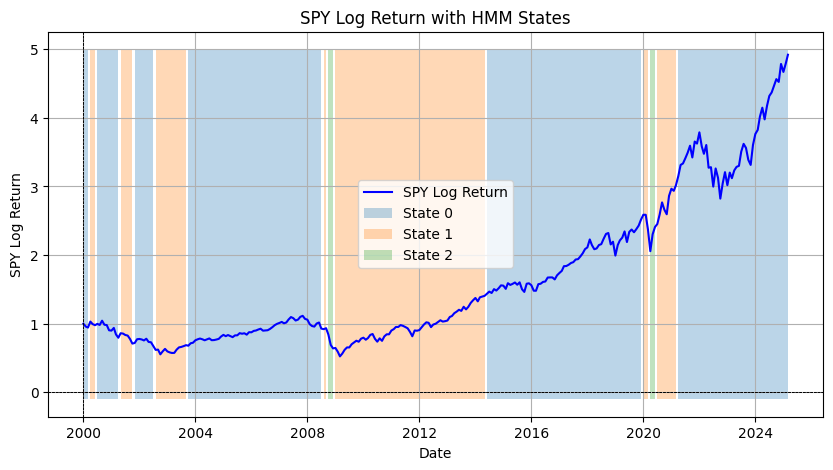

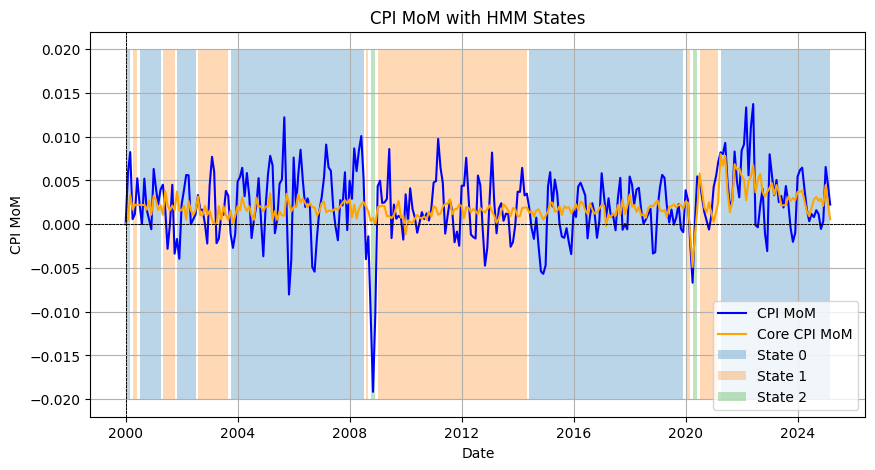

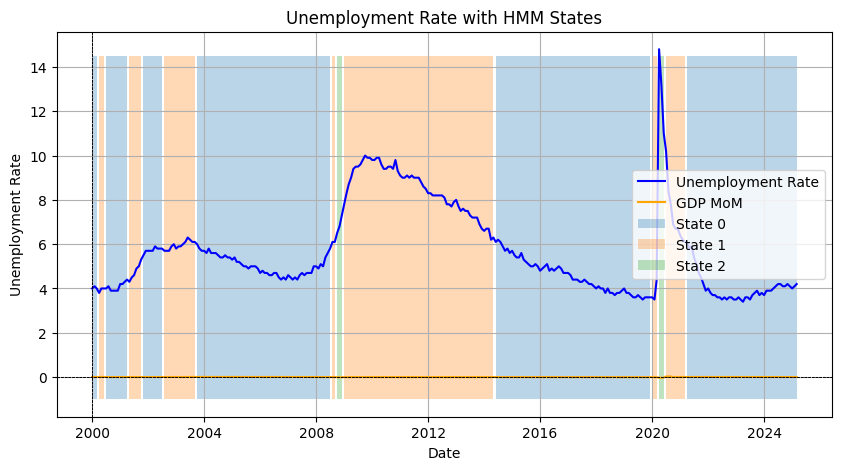

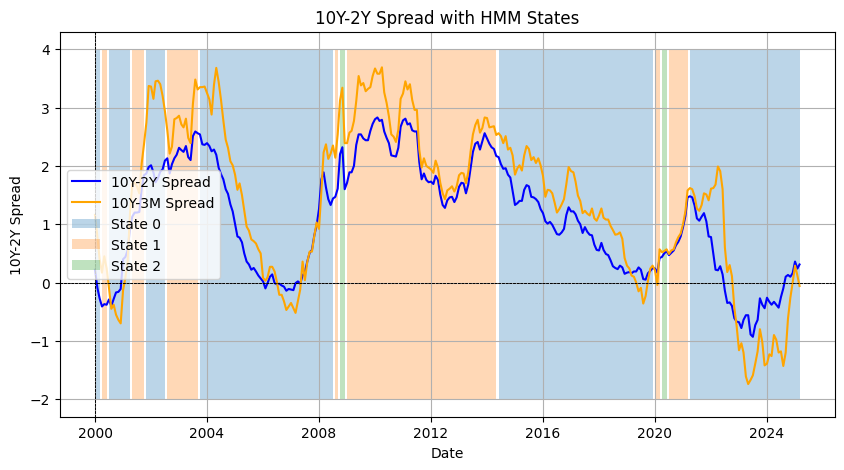

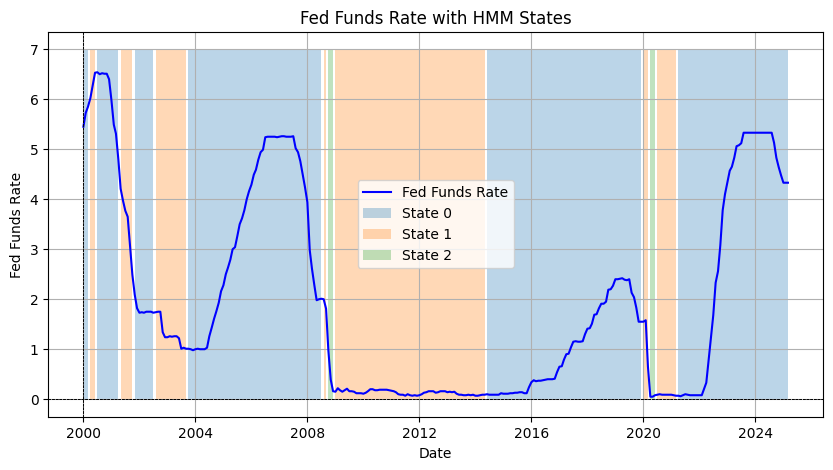

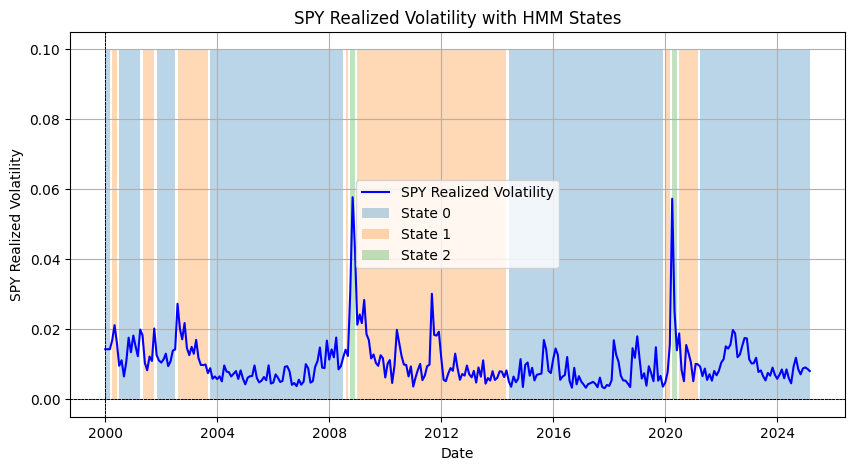

In [523]:
# We're going to use hmmlearn to train a Gaussian Hidden Markov Model on the data.
from hmmlearn.hmm import GaussianHMM

model = GaussianHMM(n_components=3, covariance_type="full", n_iter=1000, random_state=42)
model.fit(HMM_data_scaled)

print(model.means_) # Means of each value in each state ie state 2 has an average SPY monthly log return of 0.08
print(model.transmat_) # Transition matrix, the probability of moving from one state to another
# State 0 has a 96% chance of persiting, near 0% chance of switching to 1, 1% of switching to 2, and 2.15% chance of switching to 3
predictions = model.predict(HMM_data_scaled) # Predict the states for each month of data from 2000 to 2025 march
print(predictions)

# This predictions array can be applied to our HMM_data dataframe to get the state for each month.
HMM_data["State"] = predictions

# We can now use it to graph our SPY returns with their states overlayed
plt.figure(figsize=(10, 5))
# note we have to accumulate the log returns to get the actual returns
plt.plot(HMM_data.index, (HMM_data["SPY Log Return"] + 1).cumprod(), label="SPY Log Return", color="blue")
for i in range(3):
    plt.fill_between(HMM_data.index, -0.1, 5.0, where=(HMM_data["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
    plt.axvline(x=HMM_data.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0



plt.title("SPY Log Return with HMM States")
plt.xlabel("Date")
plt.ylabel("SPY Log Return")
plt.legend()
plt.grid()
plt.show()

# Lets also graph the states with the macro data
# CPI_Mom
plt.figure(figsize=(10, 5))
plt.plot(HMM_data.index, HMM_data["CPI_MoM"], label="CPI MoM", color="blue")
plt.plot(HMM_data.index, HMM_data["Core_CPI_MoM"], label="Core CPI MoM", color="orange")
for i in range(3):
    plt.fill_between(HMM_data.index, -0.02, 0.02, where=(HMM_data["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
    plt.axvline(x=HMM_data.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0

plt.title("CPI MoM with HMM States")
plt.xlabel("Date")
plt.ylabel("CPI MoM")
plt.legend()
plt.grid()
plt.show()

# Unemployment Rate
plt.figure(figsize=(10, 5))
plt.plot(HMM_data.index, HMM_data["Unemployment_Rate"], label="Unemployment Rate", color="blue")
plt.plot(HMM_data.index, HMM_data["GDP_MoM"], label="GDP MoM", color="orange")
for i in range(3):
    plt.fill_between(HMM_data.index, -1.0, 14.5, where=(HMM_data["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
    plt.axvline(x=HMM_data.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0

plt.title("Unemployment Rate with HMM States")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.grid()
plt.show()

# 10Y-2Y Spread
plt.figure(figsize=(10, 5))
plt.plot(HMM_data.index, HMM_data["10Y-2Y_Spread"], label="10Y-2Y Spread", color="blue")
plt.plot(HMM_data.index, HMM_data["10Y-3M_Spread"], label="10Y-3M Spread", color="orange")
for i in range(3):
    plt.fill_between(HMM_data.index, -2.0, 4.0, where=(HMM_data["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
    plt.axvline(x=HMM_data.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0

plt.title("10Y-2Y Spread with HMM States")
plt.xlabel("Date")
plt.ylabel("10Y-2Y Spread")
plt.legend()
plt.grid()
plt.show()

# Fed Funds Rate
plt.figure(figsize=(10, 5))
plt.plot(HMM_data.index, HMM_data["Fed_Funds_Rate"], label="Fed Funds Rate", color="blue")
for i in range(3):
    plt.fill_between(HMM_data.index, 0, 7.0, where=(HMM_data["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
    plt.axvline(x=HMM_data.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0

plt.title("Fed Funds Rate with HMM States")
plt.xlabel("Date")
plt.ylabel("Fed Funds Rate")
plt.legend()
plt.grid()
plt.show()

# Volatility
plt.figure(figsize=(10, 5))
plt.plot(HMM_data.index, HMM_data["SPY Realized Vol"], label="SPY Realized Volatility", color="blue")
for i in range(3):
    plt.fill_between(HMM_data.index, 0, 0.1, where=(HMM_data["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=0
    plt.axvline(x=HMM_data.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0

plt.title("SPY Realized Volatility with HMM States")
plt.xlabel("Date")
plt.ylabel("SPY Realized Volatility")
plt.legend()
plt.grid()
plt.show()


### Insights from the Hidden Markov Model:

**After training a 3-state Gaussian Hidden Markov Model (HMM) on standardized macroeconomic and market features (including CPI, unemployment, SPY returns, yield curve spreads, and the Fed Funds Rate), we identified three distinct economic regimes with clear interpretability:**

**State 0 — Disinflationary Stability** <span style="color:blue">BLUE</span>
- Characterized by low inflation (CPI & Core CPI), low volatility, rising SPY returns, and a steep yield curve.
- Predominantly observed in long expansions such as 2003–2007 and 2012–2019.
- Indicates healthy macro conditions with accommodative policy and strong equity performance.

**State 1 — Policy Tightening / Inflation Stress** <span style="color:orange">ORANGE</span>.
- Defined by elevated CPI, rising Fed Funds Rate, and flattening or inverted yield curves, as well as higher Unemployment rates.
- Typically associated with inflation-control cycles (e.g., mid-2000s tightening, post-2008 recession, post-2022 rate hikes).

**State 2 — Systemic Shock / Risk-Off Regime** <span style="color:green">GREEN</span>
- Associated with SPY drawdowns, high volatility, unemployment spikes, and rapid yield curve inversion.
- Appears during the 2008 financial crisis and the 2020 COVID collapse.
- Represents acute macro-financial stress and rapid regime transitions, although short-lived (just as recessions are).

**Insight:**
The model successfully recovers interpretable and persistent macro regimes.
Each regime aligns with historical inflection points and provides a powerful foundation for regime-aware risk analysis and asset allocation.

---
# Next: Sector-Level Behavior by Regime, and 
# Sector-Weighted-by-Regime Portfolio strategy.
**We intend to look at the behavior of each sector, and identify which sectors perform better during which regimes**


*This way we can identify or derive a portfolio level strategy from this information*

In [524]:
# Let's add the regime to each of the sectors

sectors_df["State"] = HMM_data["State"]
sector_state_return = {}  # Dictionary to store sector-wise data

# Iterate over each sector and its corresponding ticker
for sector, ticker in included_sectors.items():
    sector_state_return[sector] = {"mean": [], "std": [], "cumulative_return": [], "count": []}
    for i in range(3):  # Iterate over the 3 states
        # Calculate the mean log return for the current state
        mean_val = sectors_df[sectors_df["State"] == i][f"{ticker} Log Return"].mean()
        sector_state_return[sector]["mean"].append(mean_val)

        # Calculate the standard deviation (volatility) for the current state
        std_val = sectors_df[sectors_df["State"] == i][f"{ticker} Log Return"].std()
        sector_state_return[sector]["std"].append(std_val)

        # Calculate the cumulative return for the current state
        cumulative_return_val = (
            (sectors_df[sectors_df["State"] == i][f"{ticker} Log Return"] + 1).prod() - 1
        )
        sector_state_return[sector]["cumulative_return"].append(cumulative_return_val)

        # Calculate the count of months in the current state
        count_val = sectors_df[sectors_df["State"] == i][f"{ticker} Log Return"].count()
        sector_state_return[sector]["count"].append(count_val)

sector_state_return_df = pd.DataFrame.from_dict(
{
    sector: {
        "State 0 Mean": values["mean"][0],
        "State 1 Mean": values["mean"][1],
        "State 2 Mean": values["mean"][2],
        "State 0 Std": values["std"][0],
        "State 1 Std": values["std"][1],
        "State 2 Std": values["std"][2],
        "State 0 Cumulative Return": values["cumulative_return"][0],
        "State 1 Cumulative Return": values["cumulative_return"][1],
        "State 2 Cumulative Return": values["cumulative_return"][2],
        "State 0 Count": values["count"][0],
        "State 1 Count": values["count"][1],
        "State 2 Count": values["count"][2],
    }
    for sector, values in sector_state_return.items()
},
orient="index",
)

print(sector_state_return_df)

                        State 0 Mean  State 1 Mean  State 2 Mean  State 0 Std  \
Utilities                   0.008033      0.004481     -0.016352     0.043198   
Energy                      0.008868      0.001413      0.001355     0.064952   
Consumer Discretionary      0.005895      0.010859      0.002502     0.050456   
Consumer Staples            0.004774      0.009615     -0.009822     0.034579   
Industrials                 0.007206      0.007132     -0.018116     0.046193   
Healthcare                  0.006338      0.006936      0.001252     0.038871   
Financials                  0.006238      0.005861     -0.056543     0.051554   
Technology                  0.004367      0.008095      0.002983     0.064616   

                        State 1 Std  State 2 Std  State 0 Cumulative Return  \
Utilities                  0.047114     0.070948                   2.966477   
Energy                     0.083551     0.161490                   2.725203   
Consumer Discretionary     0.0590

**Sector notes about this data**
- Disinflationary Stability (State 0): All sectors had positive mean monthly log returns, with Utilities (+0.8%), Energy (+0.9%), and Industrials (+0.7%) doing the best. This regime offered the highest cumulative sector gains and lowest volatility overall. From an investment standpoint this would mean standard allocations.

- Policy Tightening / Inflation Stress (State 1): Most sectors remained resilient, especially Consumer Discretionary (+1.1%), Staples (+1.0%), and Technology (+0.8%), suggesting investor preference for growth and defensive sectors. From an investment standpoint this could mean weighting high-growth stocks more.

- Systemic Shock (State 2): Marked by severe underperformance in cyclicals — Financials (-5.7%), Industrials (-1.8%), and Utilities (-1.6%) — highlighting these periods as critical risk-off environments. From an investment standpoint this could mean weighting stable sectors like consumer discretionary and healthcare more than volatile sectors like industrials and financials.

- Rotation Insight: Discretionary and Tech sectors consistently outperformed in both State 0 and State 1, while Financials were the most regime-sensitive, with sharp losses in State 2 — offering potential regime-aware tilting opportunities.



---
### Now let's look into strategy. 
- We can derive pseudo-sharpe ratios from regime data using: cumulative_return / volatility for each sector in each regime. 
- With these ratios we can derive weights as w_i = ratio_i / sum(ratios)

In [525]:
regime_weights = pd.DataFrame(
    index=["State 0", "State 1", "State 2"],
    columns=["Utilities", "Energy", "Consumer Discretionary", "Consumer Staples", "Industrials", "Healthcare", "Financials", "Technology"],
)

# SO ORIGINALLY I was just going to use annualized cumulative returns / std^2 but this can yield negative weights. 
# Instead I decided to go with a soft-max approach, where we take the annualized cumulative returns and divide by the std^2, and then apply a softmax function to get the weights.
# This will ensure that the weights are positive and sum to 1. 
# Softmax will be e ^ (weight / t)
# For state 0, we will use a t of 2500, for state 1 we will use a t of 1000, and for state 2 we will use a t of 200.
# this is because state 0 is the most stable, and state 2 is the most volatile.
for sector in included_sectors.keys():
    annualized_returns_state_0 = (sector_state_return_df.loc[sector, "State 0 Cumulative Return"] / sector_state_return_df.loc[sector, "State 0 Count"]) + 1 ** 12
    annualized_returns_state_1 = (sector_state_return_df.loc[sector, "State 1 Cumulative Return"] / sector_state_return_df.loc[sector, "State 1 Count"]) + 1 ** 12
    annualized_returns_state_2 = (sector_state_return_df.loc[sector, "State 2 Cumulative Return"] / sector_state_return_df.loc[sector, "State 2 Count"] + 1) ** 12
    regime_weights.loc["State 0", sector] = np.exp(
        annualized_returns_state_0 / (sector_state_return_df.loc[sector, "State 0 Std"] ** 2) / 2500
    )
    regime_weights.loc["State 1", sector] = np.exp(
        annualized_returns_state_1 / (sector_state_return_df.loc[sector, "State 1 Std"] ** 2) / 750
    )
    regime_weights.loc["State 2", sector] = np.exp(
        annualized_returns_state_2 / (sector_state_return_df.loc[sector, "State 2 Std"] ** 2) / 150
    )
    

regime_ratios = regime_weights.div(regime_weights.sum(axis=1), axis=0)  # Normalize the weights to sum to 1
regime_ratios


,Utilities,Energy,Consumer Discretionary,Consumer Staples,Industrials,Healthcare,Financials,Technology
State 0,0.128209,0.113544,0.120826,0.14442,0.124677,0.134754,0.120034,0.113536
State 1,0.136785,0.090551,0.110395,0.204291,0.101766,0.160394,0.094652,0.101167
State 2,0.179952,0.077786,0.088122,0.237643,0.098006,0.141854,0.074544,0.102093


### Now it's time to test. We have daily sector pricing data in SectorDataDaily, and the regimes defined in our HMM_data dataFrame.
- We will explore the performance of both equal weights to each sector (0.125) 
- As well as exploring the adjusted sector weighting model to compare with.

In [526]:
sectors_df_daily = pd.DataFrame()
sectors_df_daily["DATE"] = pd.date_range(start="2000-01-01", end="2025-03-01", freq="D")
sectors_df_daily.set_index("DATE", inplace=True)

for sector, ticker in included_sectors.items():
    data = pd.read_csv(f"SectorDataDaily/{ticker}daily.csv", parse_dates=["DATE"])
    data.set_index("DATE", inplace=True)
    data.rename(columns={"Close": f"{ticker} Close"}, inplace=True)
    sectors_df_daily = pd.merge(sectors_df_daily, data, left_index=True, right_index=True, how="outer")

sectors_df_daily = pd.merge(sectors_df_daily, HMM_data[["State"]], left_index=True, right_index=True, how="outer")
sectors_df_daily["State"] = sectors_df_daily["State"].ffill() # Forward fill the state to get the daily state
sectors_df_daily.dropna(inplace=True) # Drop any rows with NaN values (WEEKENDS)
sectors_df_daily


,XLU Close,XLE Close,XLY Close,XLP Close,XLI Close,XLV Close,XLF Close,XLK Close,State
DATE,,,,,,,,,
2000-01-03,11.339869,13.739207,22.478342,12.474505,18.318462,20.805294,11.262168,41.488522,0.0
2000-01-04,10.997801,13.480583,21.802114,12.123240,17.812386,20.333179,10.769834,39.383686,0.0
2000-01-05,11.275327,13.836190,21.533968,12.337432,17.733002,20.150774,10.685212,38.799015,0.0
2000-01-06,11.255971,14.369594,21.778795,12.568756,17.971159,20.215145,11.154476,37.512733,0.0
2000-01-07,11.352775,14.523149,22.804785,13.365554,18.655865,20.461933,11.339097,38.167576,0.0
...,...,...,...,...,...,...,...,...,...
2025-02-24,79.307114,90.246147,216.972778,81.995667,133.818939,147.051056,50.785538,231.104233,0.0
2025-02-25,78.909927,88.946289,215.835892,83.159500,134.506821,148.316177,50.775570,228.109497,0.0
2025-02-26,79.237602,88.440231,214.948349,81.567932,134.586578,147.250305,50.665970,230.595139,0.0


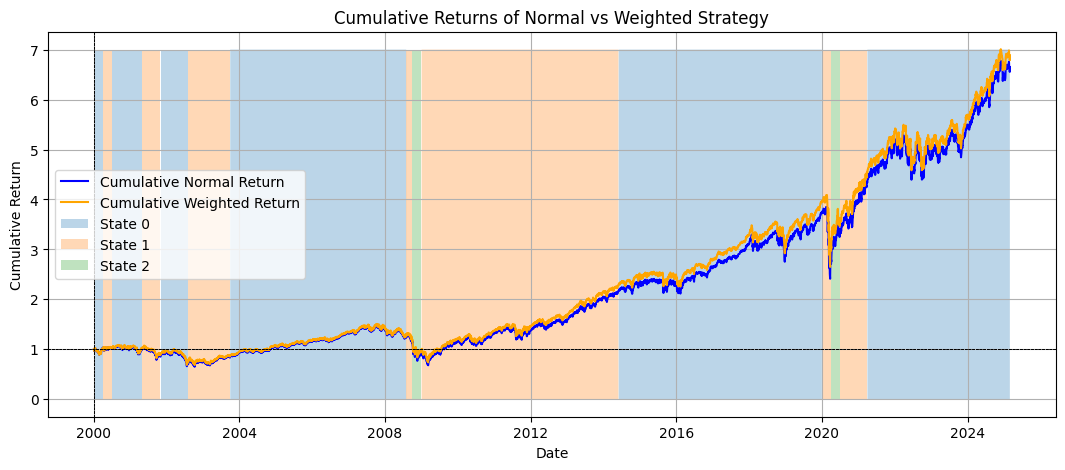

,Value
Metric,
Annualized Normal Return %,7.838350
Annualized Weighted Return %,7.987326
Annualized Normal Volatility,10.828065
Annualized Weighted Volatility,10.586312
Max Drawdown Normal %,-54.211810
Max Drawdown Weighted %,-50.959291
Sharpe Ratio Normal,0.722045
Sharpe Ratio Weighted,0.752606


In [528]:
# STEP 1: Compute daily log returns and weighted returns
for sector, ticker in included_sectors.items():
    sectors_df_daily[f"{ticker} Log Return"] = np.log(sectors_df_daily[f"{ticker} Close"] / sectors_df_daily[f"{ticker} Close"].shift(1)).fillna(0)
    sectors_df_daily[f"{ticker} Weighted Log Return"] = (
        sectors_df_daily[f"{ticker} Log Return"] *
        sectors_df_daily["State"].map(lambda x: regime_ratios.loc[f"State {int(x)}", sector])
    )

# STEP 2: Compute net portfolio log returns (daily)
sectors_df_daily["Net Normal Log Return"] = 0
sectors_df_daily["Net Weighted Log Return"] = 0

equal_weight = 1 / len(included_sectors)

for sector, ticker in included_sectors.items():
    sectors_df_daily["Net Normal Log Return"] += equal_weight * sectors_df_daily[f"{ticker} Log Return"]
    sectors_df_daily["Net Weighted Log Return"] += sectors_df_daily[f"{ticker} Weighted Log Return"]

# STEP 3: Compute cumulative returns
sectors_df_daily["Cumulative Normal Return"] = np.exp(sectors_df_daily["Net Normal Log Return"].cumsum())
sectors_df_daily["Cumulative Weighted Return"] = np.exp(sectors_df_daily["Net Weighted Log Return"].cumsum())

# STEP 4: Compute annualized returns and volatility
strategy_df = pd.DataFrame()
strategy_df["Cumulative Normal Return"] = sectors_df_daily["Cumulative Normal Return"]
strategy_df["Cumulative Weighted Return"] = sectors_df_daily["Cumulative Weighted Return"]
strategy_df["State"] = sectors_df_daily["State"]
strategy_df["Annualized Normal Return"] = (strategy_df["Cumulative Normal Return"] ** (1 / (len(strategy_df) / 252)) - 1) * 100
strategy_df["Annualized Weighted Return"] = (strategy_df["Cumulative Weighted Return"] ** (1 / (len(strategy_df) / 252)) - 1) * 100
strategy_df["Annualized Normal Volatility"] = strategy_df["Cumulative Normal Return"].pct_change().rolling(window=21).std() * np.sqrt(252) * 100
strategy_df["Annualized Weighted Volatility"] = strategy_df["Cumulative Weighted Return"].pct_change().rolling(window=21).std() * np.sqrt(252) * 100

strategy_df["Annualized Normal Volatility"] = strategy_df["Annualized Normal Volatility"].bfill()
strategy_df["Annualized Weighted Volatility"] = strategy_df["Annualized Weighted Volatility"].bfill()
max_drawdown_normal = (strategy_df["Cumulative Normal Return"] / strategy_df["Cumulative Normal Return"].cummax() - 1).min() * 100
max_drawdown_weighted = (strategy_df["Cumulative Weighted Return"] / strategy_df["Cumulative Weighted Return"].cummax() - 1).min() * 100
sharpe_ratio_normal = (strategy_df["Annualized Normal Return"] - 0.02) / strategy_df["Annualized Normal Volatility"]
sharpe_ratio_weighted = (strategy_df["Annualized Weighted Return"] - 0.02) / strategy_df["Annualized Weighted Volatility"]

# Plotting the cumulative returns
plt.figure(figsize=(13, 5))
plt.plot(sectors_df_daily.index, sectors_df_daily["Cumulative Normal Return"], label="Cumulative Normal Return", color="blue")
plt.plot(sectors_df_daily.index, sectors_df_daily["Cumulative Weighted Return"], label="Cumulative Weighted Return", color="orange")
for i in range(3):
    plt.fill_between(sectors_df_daily.index, 0, 7.0, where=(sectors_df_daily["State"] == i), alpha=0.3, label=f"State {i}")
    plt.axhline(y=1, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=1
    plt.axvline(x=sectors_df_daily.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0

plt.axhline(y=1, color='k', linestyle='--', linewidth=0.5)  # Add a horizontal line at y=1
plt.axvline(x=sectors_df_daily.index[0], color='k', linestyle='--', linewidth=0.5)  # Add a vertical line at x=0
plt.title("Cumulative Returns of Normal vs Weighted Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid()
plt.show()

# Print comparatives in table format
comparative_df = pd.DataFrame({
    "Metric": ["Annualized Normal Return %", "Annualized Weighted Return %", "Annualized Normal Volatility", "Annualized Weighted Volatility", "Max Drawdown Normal %", "Max Drawdown Weighted %", "Sharpe Ratio Normal", "Sharpe Ratio Weighted"],
    "Value": [strategy_df["Annualized Normal Return"].iloc[-1], strategy_df["Annualized Weighted Return"].iloc[-1], strategy_df["Annualized Normal Volatility"].iloc[-1], strategy_df["Annualized Weighted Volatility"].iloc[-1], max_drawdown_normal, max_drawdown_weighted, sharpe_ratio_normal.iloc[-1], sharpe_ratio_weighted.iloc[-1]]
})
comparative_df = comparative_df.set_index("Metric")
comparative_df

### NOW THIS IS COOL:
- The weighted strategy, without even being fine-tuned is outperforming a normal equal-weights strategy among every metric, including annualize % returns, volatility, drawdown, and sharpe.
- Some important things to note: this model is assuming we have immediate reactions to regime changes, which is unrealistic, however it does provide a baseline for how IC can use portfolio-wide optimization in order to improve it's returns in the long run.
---
**Let's look closer at a 5-year by 5-year comparison (2020-2024dec) (2025jan-2029dec)**

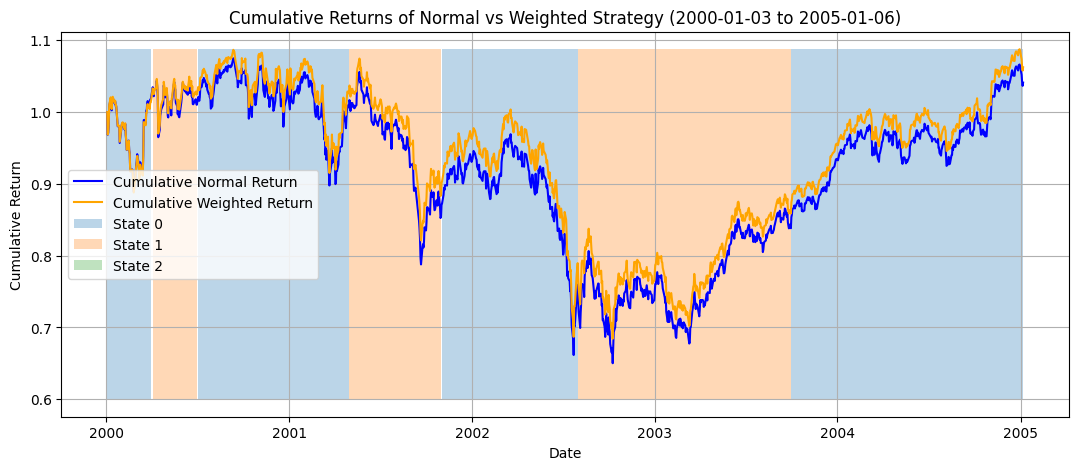

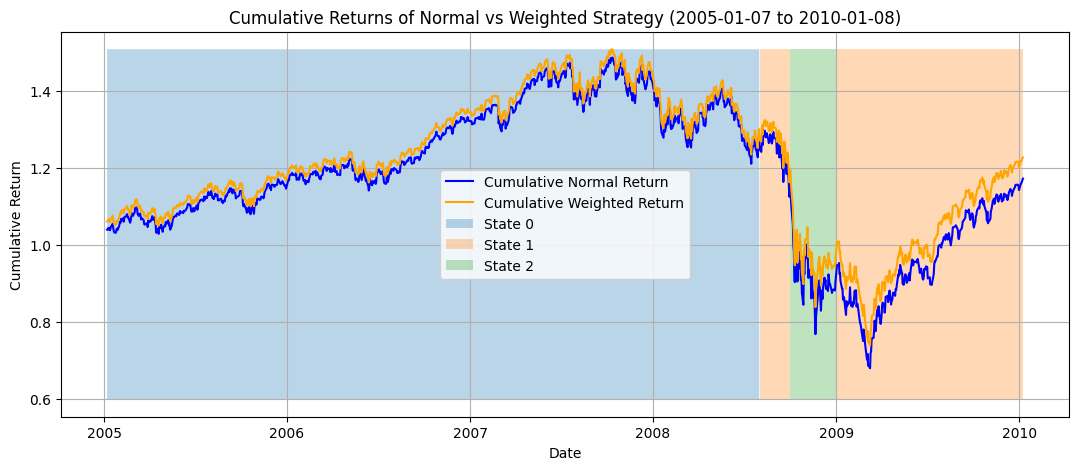

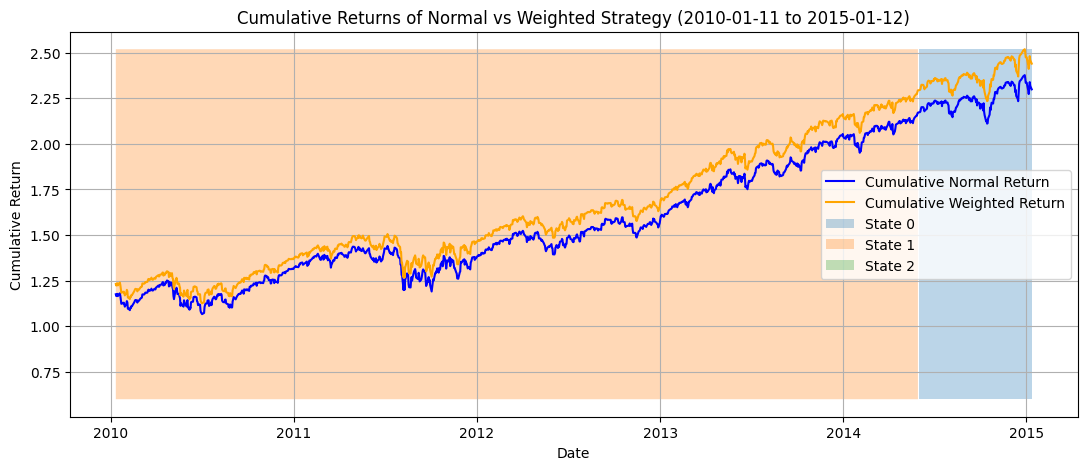

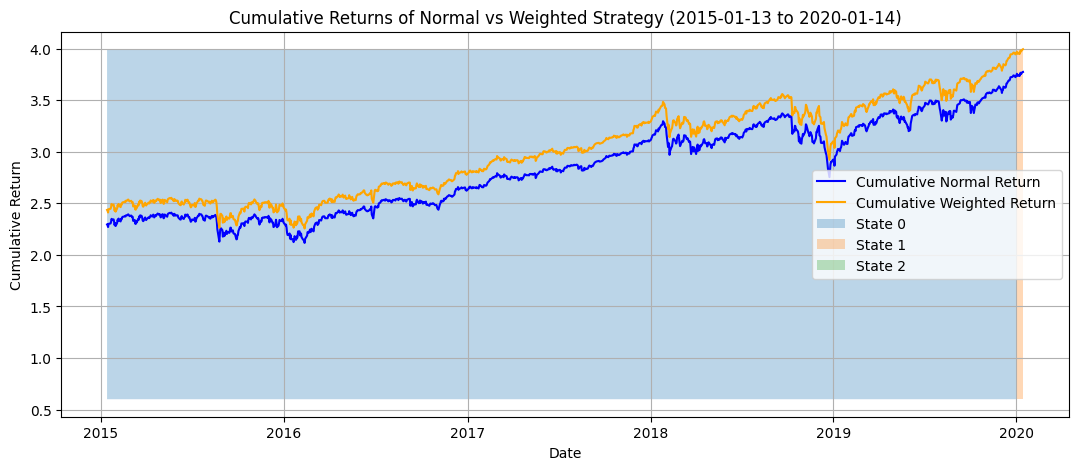

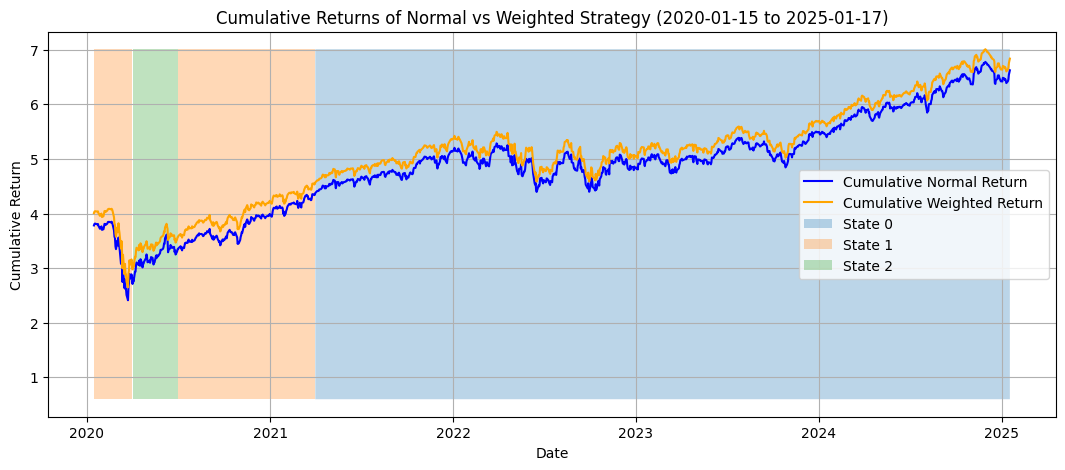

In [531]:
# Graph Cumulative returns in groups of 5 years (first 5 groups only)
for i in range(0, min(5 * 5 * 252, len(sectors_df_daily)), 5 * 252):
    max_height = max(
        sectors_df_daily["Cumulative Normal Return"][i:i + 5 * 252].max(),
        sectors_df_daily["Cumulative Weighted Return"][i:i + 5 * 252].max()
    )
    
    plt.figure(figsize=(13, 5))
    plt.plot(sectors_df_daily.index[i:i + 5 * 252], sectors_df_daily["Cumulative Normal Return"][i:i + 5 * 252], label="Cumulative Normal Return", color="blue")
    plt.plot(sectors_df_daily.index[i:i + 5 * 252], sectors_df_daily["Cumulative Weighted Return"][i:i + 5 * 252], label="Cumulative Weighted Return", color="orange")
    
    for j in range(3):
        plt.fill_between(
            sectors_df_daily.index[i:i + 5 * 252],
            0.6,
            max_height,
            where=(sectors_df_daily["State"][i:i + 5 * 252] == j),
            alpha=0.3,
            label=f"State {j}"
        )
    
    plt.title(f"Cumulative Returns of Normal vs Weighted Strategy ({sectors_df_daily.index[i].date()} to {sectors_df_daily.index[min(i + 5 * 252 - 1, len(sectors_df_daily) - 1)].date()})")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid()
    plt.show()

# Conclusions:

This notebook presents a full-cycle, *macro-regime-aware framework* that links macroeconomic market signals (yield curves, inflation, unemployment, and policy rates) to regime-based sector allocation. 

By using a **Hidden Markov Model** to classify historical macro regimes, we show that sector returns and volatility **are not random** — they respond systematically to the macroeconomic environment.

Our strategy does not seek to time markets, but rather to adjust exposure intelligently in response to shifting macro regimes. Over a 25-year period, the regime-aware portfolio achieved a **higher Sharpe ratio and reduced drawdowns** versus a naïve equal-weight approach — without introducing complexity or leverage.

### Investment Committee Application:
This regime-aware framework could be integrated into the IC’s asset allocation process as a systematic overlay for sector exposure. By rebalancing monthly in response to macro regime shifts, it would allow us to use proactive tilting toward sectors with historically better performance under each macro environment.

Specifically, it provides a quantifiable hedge against inflation surprises, policy tightening cycles, and economic crises — helping the IC enhance return efficiency and reduce portfolio vulnerability during regime transitions.

### Limitations:
- Immediate Regime Detection Assumption: The model assumes perfect, real-time identification of macro regimes. In practice regime detection takes time, and is **NOT** certain. 

- Instantaneous Portfolio Rebalancing: The strategy switches sector weights immediately when regimes change. In reality, the IC would need to actively make the decision, and there would be transaction costs, as well as considerations of stock-specific reallocation.

- Overfitting Risk: Regime-specific weights are derived from historical performance, which could not generalize out-of-sample or under future macroeconomic conditions.

- Macro Data Timing: Some inputs (e.g., GDP growth, unemployment) are revised or lagged in reality, making live implementation more complex than performed here.